In [26]:
import pandas
import numpy
from sklearn import *
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import pickle

Load dataset

In [ ]:
DATA_FILE_URL = 'https://raw.githubusercontent.com/SasidharSekar/Classification-abalone-sex/refs/heads/main/abalone-data.csv'
col_names = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
data = pandas.read_csv(DATA_FILE_URL,sep=',',quotechar='"', header=None, names=col_names)

View Data Distribution

In [ ]:
print("Data Size: %d" %data.size)
print(data.head(10))
print(data.describe())
print(data.groupby('Sex').size())
excl_gender = data.iloc[:,1:]
print(excl_gender.corr())

Visualize Data Distribution

In [ ]:
data.hist()
pyplot.show()
X = data.iloc[:,1:]
X.boxplot()
pyplot.show()
scatter_matrix(data)
pyplot.show()

Model Evaluation Preparation

In [ ]:
array = data.values
X = array[:,1:]
y = array[:,0]
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)

models = []
models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC(gamma="auto")))

Model Evaluation

In [19]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
    cv_results = cross_val_score(model,scaled_X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f(%f)' %(name, cv_results.mean(), cv_results.std()))

LR: 0.551926(0.019595)
LDA: 0.543544(0.023996)
KNN: 0.530679(0.033656)
CART: 0.491766(0.031181)
NB: 0.516308(0.024742)
SVM: 0.536069(0.015365)


Compare Algorithms

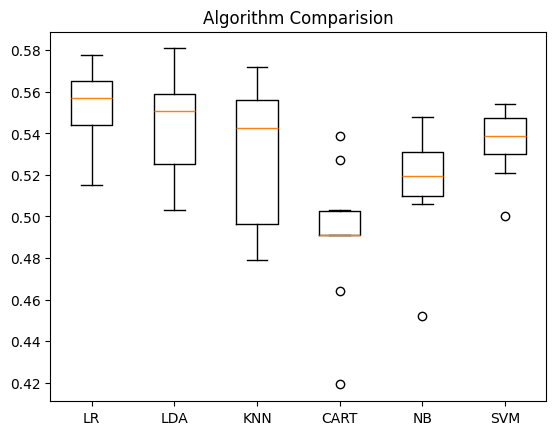

In [20]:
pyplot.boxplot(results,tick_labels=names)
pyplot.title('Algorithm Comparision') 
pyplot.show()

Make Predictions

In [21]:
model = LogisticRegression()
model.fit(scaled_X_train,y_train)
predictions = model.predict(scaled_X_val)
print(accuracy_score(y_val,predictions))
print(confusion_matrix(y_val,predictions))
print(classification_report(y_val,predictions))

0.5741626794258373
[[ 85  41 134]
 [ 12 221  31]
 [ 69  69 174]]
              precision    recall  f1-score   support

           F       0.51      0.33      0.40       260
           I       0.67      0.84      0.74       264
           M       0.51      0.56      0.53       312

    accuracy                           0.57       836
   macro avg       0.56      0.57      0.56       836
weighted avg       0.56      0.57      0.56       836



Make individual predictions

In [22]:
str_x_test = input("Enter input parameters as Comma Separated values")
x_test = str_x_test.split(",")
X_test = numpy.array(x_test)
X_test = X_test.reshape(1,-1)
X_test = X_test.astype(float)
scaled_X_test = scaler.transform(X_test)
prediction = model.predict(scaled_X_test)
print(prediction)

['M']


Save Model to File

In [23]:
filename = 'final_model_classification_abalone_sex.sav'
pickle.dump(model, open(filename,'wb'))

Load Model from File and predict

In [25]:
model = pickle.load(open(filename,'rb'))
predictions = model.predict(scaled_X_val)
print(accuracy_score(y_val,predictions))

0.5741626794258373
